<a href="https://colab.research.google.com/github/LailaBulh/Programacion---Claas-Files/blob/main/practica19_263166.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Práctica 19: Ejercicios con EDA 2**

Link Github: [Practica19_LB](https://github.com/LailaBulh/Programacion---Claas-Files/blob/main/practica19_263166.ipynb)

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
import scipy.stats as stats


In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data"
column_names = ['age', 'year', 'nodes', 'status']
df = pd.read_csv(url, header=None, names=column_names)


In [32]:

print('\nVista previa del dataset:\n',df.head(),'\n')
print('\nTipo de datos por columna:')
print(df.info(),'\n')

completeness = df.isnull().sum()
print('\nValores nulos por columna:\n',completeness)

col_count = df[['age','year','nodes']].value_counts()
#print(col_count)

#print('\nEdad media de los pacientes:\n',df['age'].mean())

#print('\n',df['age'].unique(),'\n')
#print('\n',df['year'].unique(),'\n')
#print('\nCount por ganglios\n',df['nodes'].value_counts(),'\n')

print('\nValores faltantes en dataset:\n',df.isnull().sum())

print('\n',df.describe())



Vista previa del dataset:
    age  year  nodes                              status
0   30    64      1  Patient survived 5 years or longer
1   30    62      3  Patient survived 5 years or longer
2   30    65      0  Patient survived 5 years or longer
3   31    59      2  Patient survived 5 years or longer
4   31    65      4  Patient survived 5 years or longer 


Tipo de datos por columna:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   age     306 non-null    int64   
 1   year    306 non-null    int64   
 2   nodes   306 non-null    int64   
 3   status  306 non-null    category
dtypes: category(1), int64(3)
memory usage: 7.7 KB
None 


Valores nulos por columna:
 age       0
year      0
nodes     0
status    0
dtype: int64

Valores faltantes en dataset:
 age       0
year      0
nodes     0
status    0
dtype: int64

               age        year  

# **Histograma de columnas numericas**

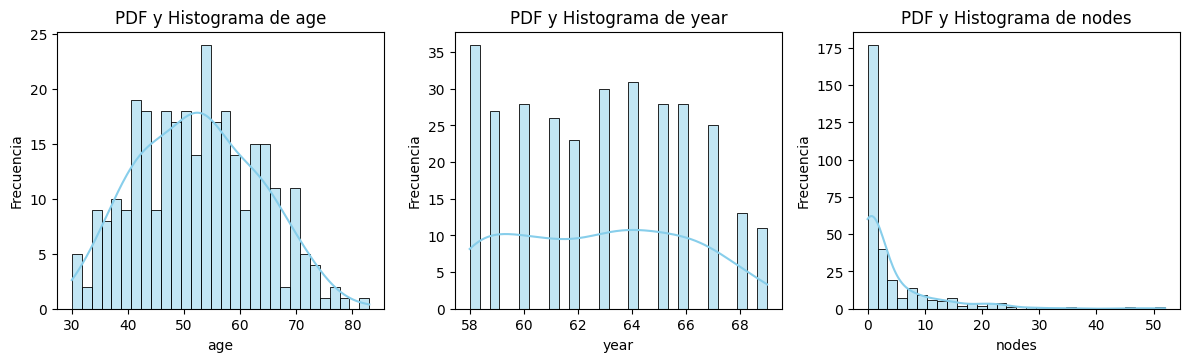

In [ ]:
columns = df[['age','year','nodes']]

# Crear los gráficos de PDF e Histograma
plt.figure(figsize=(12, 10))
for i, col in enumerate(columns, 1):
    plt.subplot(3, 3, i)  # Ajustar la cantidad de subgráficos según el número de columnas
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'PDF y Histograma de {col}', fontsize=12)
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Frecuencia', fontsize=10)

plt.tight_layout()
plt.show()

# **Grafica de barras para columna status de supervivencia**


La supervivencia total de los pacientes de este analisis fue: status
Patient survived 5 years or longer    225
Patient died within 5 year             81
Name: count, dtype: int64 



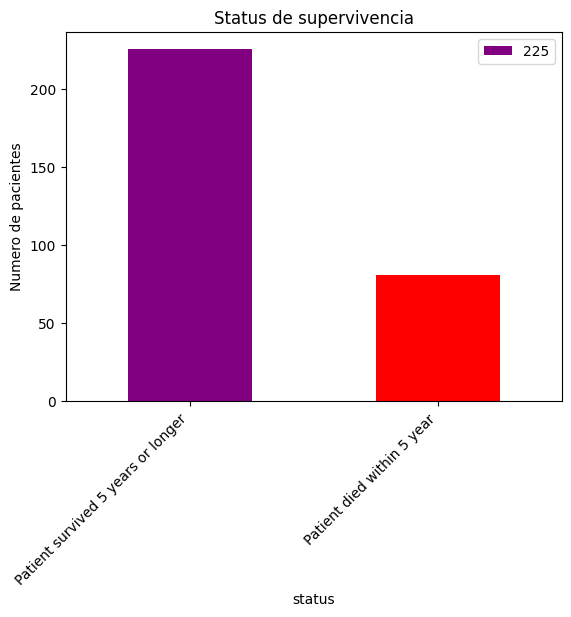

In [47]:
df['status'] = df['status'].astype('category').cat.rename_categories({1:'Patient survived 5 years or longer',2:'Patient died within 5 year'})
#print(df['status'])

status_counts = df['status'].value_counts()
print('\nLa supervivencia total de los pacientes de este analisis fue:', status_counts, '\n')

color = ['purple','red']
status_counts.plot.bar(color= color)
plt.title('Status de supervivencia')
plt.ylabel('Numero de pacientes')
plt.xticks(rotation= 45, ha='right')
plt.legend(status_counts)
plt.show()

# **Boxplots para identificar outliers en las columnas numéricas.**

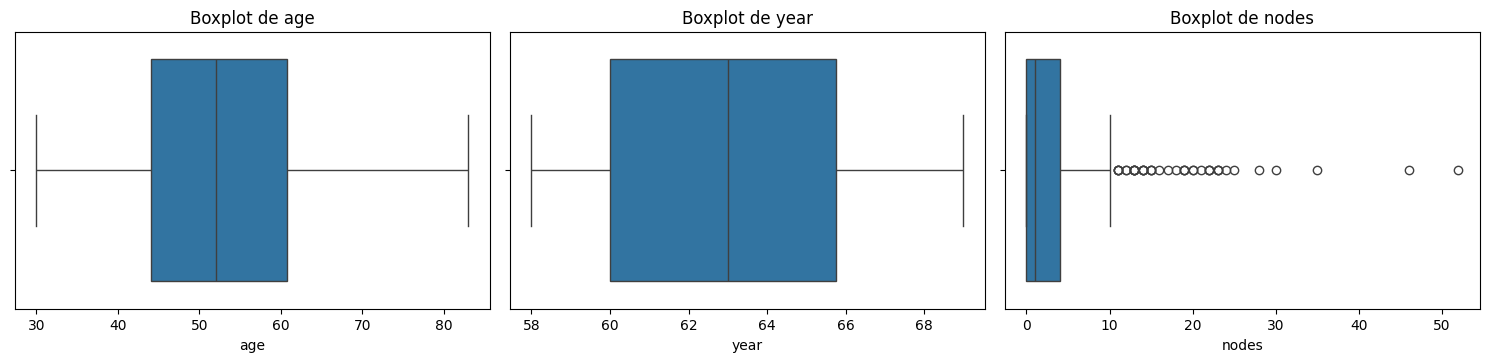

In [55]:
plt.figure(figsize= (15,10))

#print(columns)
#colors_bxp = ['peachpuff', 'orange', 'tomato']

for i, col in enumerate(columns, 1):
  plt.subplot(3, 3, i)
  sns.boxplot(x= df[col])
  plt.title(f'Boxplot de {col}')

plt.tight_layout()
plt.show()


# **Matriz de correlación y mapa de calor.**

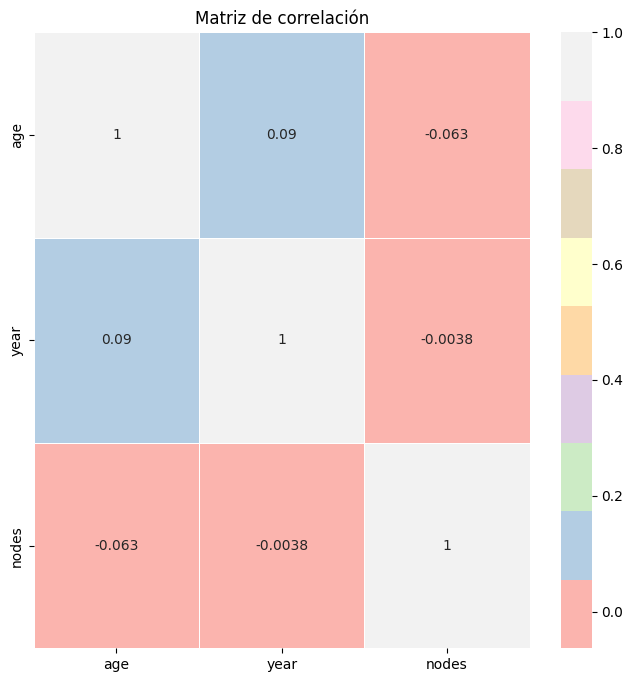

In [95]:
matriz_corr = columns.corr()
#print(matriz_corr)

plt.figure(figsize= (8,8))
sns.heatmap(matriz_corr, annot= True,  cmap='Pastel1', linewidths=0.5)
plt.title('Matriz de correlación')
plt.show()

# **Pairplot para visualizar relaciones entre variables numéricas.**

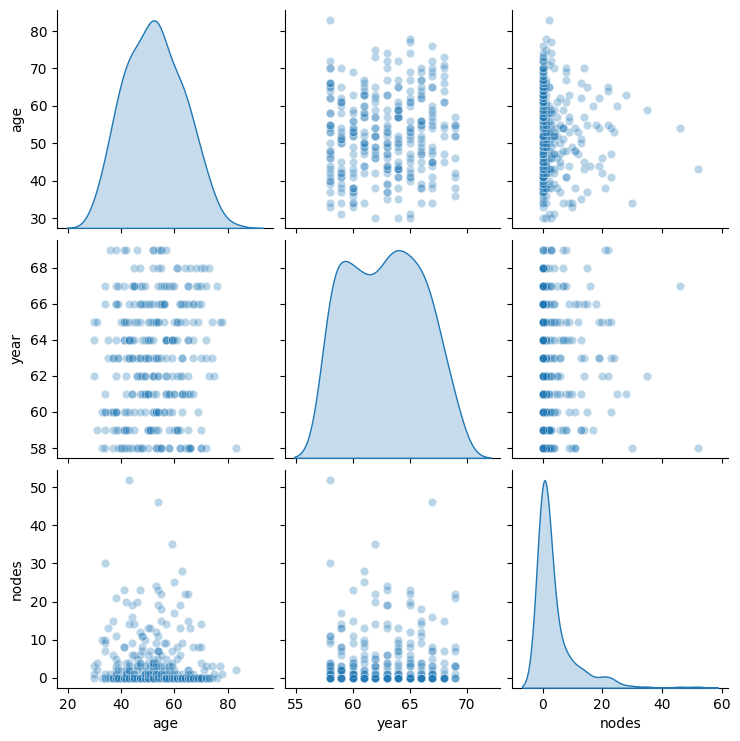

In [101]:
sns.pairplot(columns, plot_kws={'alpha': 0.3}, diag_kind='kde')
plt.show()

# **Pruebas de normalidad (Shapiro-Wilk, Anderson-Darling, Kolmogorov-Smirnov) y QQplot para las columnas numéricas.**

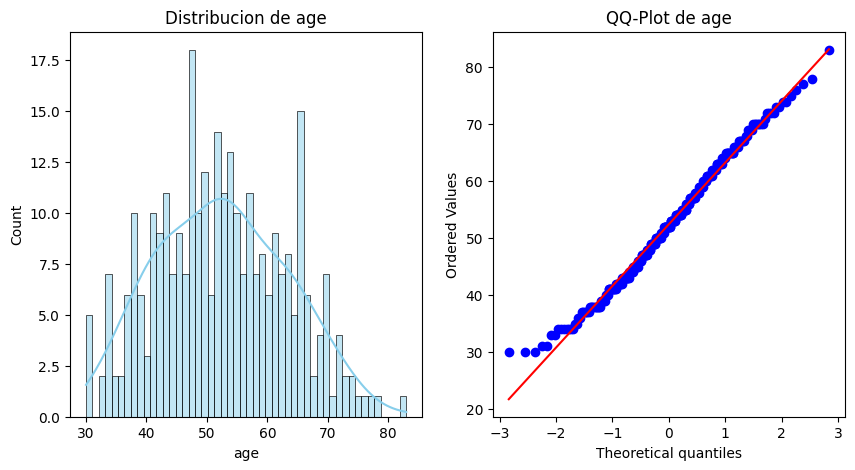


Pruebas de normalidad para la columna age

Shapiro-Wilk test: p-valor = 0.02605

Kolmogorov-Smirnov test: p-valor = 0.46980

Anderson-Darling test: Estadistico = 0.73156

Al nivel de significancia 15.0%, los datos NO parecen normales.

Al nivel de significancia 10.0%, los datos NO parecen normales.

Al nivel de significancia 5.0%, los datos parecen normales.

Al nivel de significancia 2.5%, los datos parecen normales.

Al nivel de significancia 1.0%, los datos parecen normales.

D'Agistino-Pearson test: p-valor = 0.00780


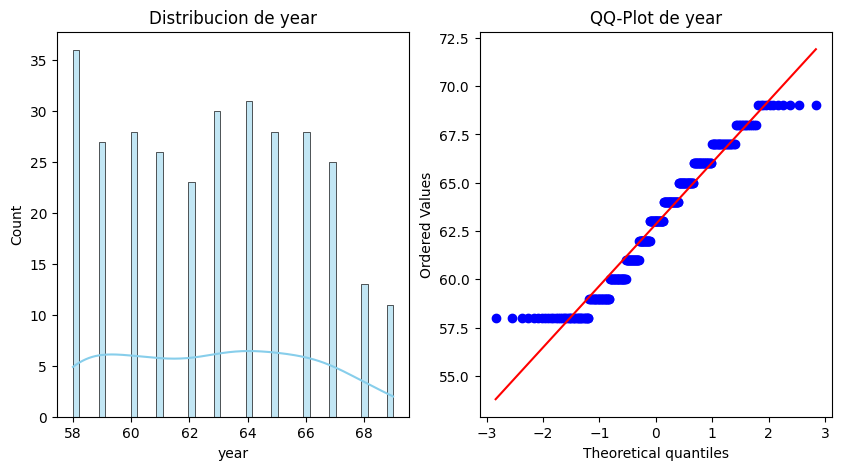


Pruebas de normalidad para la columna year

Shapiro-Wilk test: p-valor = 0.00000

Kolmogorov-Smirnov test: p-valor = 0.00158

Anderson-Darling test: Estadistico = 4.31374

Al nivel de significancia 15.0%, los datos NO parecen normales.

Al nivel de significancia 10.0%, los datos NO parecen normales.

Al nivel de significancia 5.0%, los datos NO parecen normales.

Al nivel de significancia 2.5%, los datos NO parecen normales.

Al nivel de significancia 1.0%, los datos NO parecen normales.

D'Agistino-Pearson test: p-valor = 0.00000


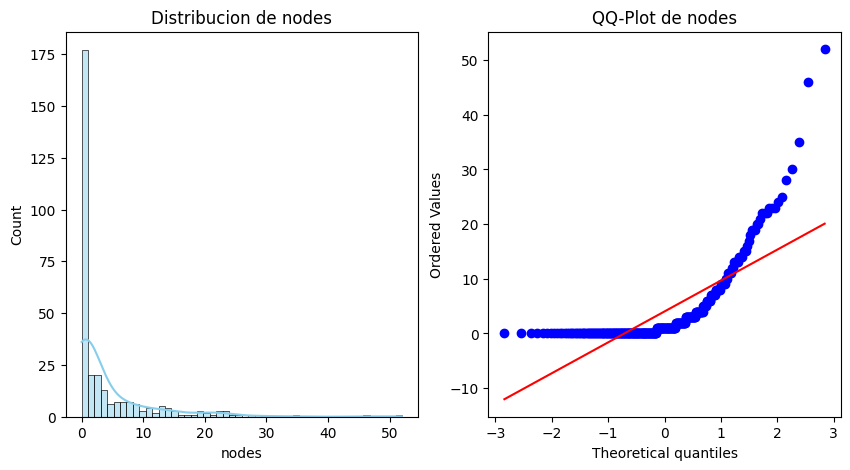


Pruebas de normalidad para la columna nodes

Shapiro-Wilk test: p-valor = 0.00000

Kolmogorov-Smirnov test: p-valor = 0.00000

Anderson-Darling test: Estadistico = 39.68662

Al nivel de significancia 15.0%, los datos NO parecen normales.

Al nivel de significancia 10.0%, los datos NO parecen normales.

Al nivel de significancia 5.0%, los datos NO parecen normales.

Al nivel de significancia 2.5%, los datos NO parecen normales.

Al nivel de significancia 1.0%, los datos NO parecen normales.

D'Agistino-Pearson test: p-valor = 0.00000


In [18]:
#print(columns)

### Funcion pruebas de normalidad
def normality_test(data, column_name):
  print(f'\nPruebas de normalidad para la columna {column_name}')

  ### Prueba Shapiro_wilk
  shapiro_test = stats.shapiro(data.sample(min(5000, len(data)), random_state= 42))
  print(f'\nShapiro-Wilk test: p-valor = {shapiro_test.pvalue:.5f}')

  ### Prueba de Kolmogorov_Smirnov
  ks_test = stats.kstest(data, 'norm', args= (data.mean(), data.std()))
  print(f'\nKolmogorov-Smirnov test: p-valor = {ks_test.pvalue:.5f}')

  ### Prueba de Anderson_Darling
  anderson_test = stats.anderson(data, dist= 'norm')
  print(f'\nAnderson-Darling test: Estadistico = {anderson_test.statistic:.5f}')
  for i in range(len(anderson_test.critical_values)):
    sl, cv = anderson_test.significance_level[i], anderson_test.critical_values[i]
    if anderson_test.statistic < cv:
      print(f'\nAl nivel de significancia {sl}%, los datos parecen normales.')
    else:
      print(f'\nAl nivel de significancia {sl}%, los datos NO parecen normales.')

  ### Prueba de D'Agostino-Pearson
  dagostino_test = stats.normaltest(data)
  print(f"\nD'Agistino-Pearson test: p-valor = {dagostino_test.pvalue:.5f}")

### Funcion para histograma y QQ-plot
def plot_distribution(data, column_name):
  plt.figure(figsize= (10,5))

  ### Histograma
  plt.subplot(1, 2, 1)
  sns.histplot(data, bins= 50, kde= True, color= 'skyblue')
  plt.title(f'Distribucion de {column_name}')

  ### QQ-plot
  plt.subplot(1, 2, 2)
  stats.probplot(data, dist= 'norm', plot= plt)
  plt.title(f'QQ-Plot de {column_name}')

  plt.show()

### Pruebas de normalidad y graficos de cada columna
for cols in columns:
  data= df[cols]
  plot_distribution(data, cols)
  normality_test(data, cols)
